                                                            UC00139: Optimization of Outdoor Activities

Functionality 1: Natural (with nature/environment) Physical Conditioning Optimization

Optimization of the Outdoor or Open-Space Fitness Activities In Melbourne
Authored by: Ananya Krishnan
Duration: 90 mins
Level: Intermediate
Pre-requisite Skills: Python, , Geospatial Analysis, Clustering, Predictive Modelling, Machine Learning

Scenario
In the city of Melbourne, population of people who prefer outdoor fitness is around 10.3 million. Thus, the problem identified in such activities are as follows-
1. Ideal spots to execute their workouts.
2. Viable enhancements of such outdoor facilities that are useful to everyone in general are predicted.
3. Recommendations report generated for the same.
The final objective is to solve such problems, to do so a solution is created such that all issues are tackled. The places for fitness training are showcased on the map of melbourne city.

What this use case will teach you
At the end of this use case you will:

How to install packages and import data. 
Load the data using APIs.
Cleaning, manipulating, and pre-processing the data according to the requirements.
Geospatial analysis performed, followed by k-means clustering to retrieve the exact locations where open-space exercises can be done.
Visualising and mapping the entire information.
Predictive modeling utilized for enhancement predictions of the open spaces.
Provide data-driven recommendations for optimal placing of aminities and shaded areas.ß

Introduction and Background

Simply performing daily routine exercises anywhere is not just hazardous to one's safety but also brings in lots of other troubles to folks around. Thus, some specific spaces exist for this purpose. Where it is, what enhancements are possible based on needs of an avid exerciser, and what recommendations can be provided in any report in this regard; become major concerns. The root roadblocks that these identified problems can bring in are accidents on roads/hindrance to others in various forms, if basic aminities like (drinking fountains, washrooms or seats) are not there then it can be reported to government, and to do so a suggetstion report has to be generated.

To deal with all this mess a solution is developed using the stack of technology mentioned above where step-by-step everything is sorted.

Assumptions Considered:
1. Pedestrian network is considered safe for outdoor activitiees (High traffic zone is penalized and does not affect the movement of people).
2. Tree canopy dataset from year 2018 has no change in year 2024.


HANDS-ON EXECUTION OF IMPLEMENTATION STEPS

STEP 1: PRE-REQUISITES AND LIBRARY INSTALLATIONS ALONG WITH IMPORTING DATA FROM PACKAGES

In [2]:
! pip install requests pandas numpy geopandas scikit-learn matplotlib folium

In [3]:
import requests                        # Used in Step 2
import pandas as pd                    # Used in Step 2
from io import StringIO                # Used in Step 2
import geopandas as gpd                # Used in Step 3
from shapely.geometry import Point     # Used in Step 3
#from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#import seaborn as sns  
import folium
                
import matplotlib.pyplot as plt        # Used in Step 3,5


STEP 2: DATA ACQUISITION

In [ ]:
# parsing the dataset name and API key
def API_upload(link_dataset):
 
    # define API endpoints
    core_url= 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    # dataset_id= apiKey
    key= link_dataset
    format= 'csv'
    web_url= f'{core_url}{key}/exports/{format}'
    params={
        # similar to SQL's  queries
        'select': '*',      # selects all fields from dataset
        'timezone': 'UTC',  # setting desired time zone in return data
        'lang': 'en',       # specifies language preference of data being retrieved
        'limit': '-1',      # defines maximum number of records to return
    }
    # get request for retrieving response
    response= requests.get(web_url, params= params)
    if response.status_code == 200:
        url_content= response.content.decode('utf-8')                   # convert raw response in bytes into UTF-8 encoded string
        df_dataset= pd.read_csv(StringIO(url_content), delimiter= ';')  # parse the csv content into a pandas DataFrame
        print('\n', key, '\n', df_dataset)
        pd.set_option('display.max_columns', None)                      # exhibit all coloumns of the data set
        print('\nlength of above dataset=', len(df_dataset))            # length of dataset computed
        return df_dataset
    else:
        return (print(f'Error fetching data from {web_url}: {response.status_code}'))
    
# download url 1.1.0 (Service 1.for pedestrian data.sensor location URL)
link_pedCount= 'pedestrian-counting-system-sensor-locations'
# download url 1.1.1 (Service 1.for pedestrian data.pedestrian count every minute URL)
link_countPm= 'pedestrian-counting-system-past-hour-counts-per-minute'
# download url 1.2.0 (Service 1.for open space data.urban forest URL)
link_urbanForest= 'trees-with-species-and-dimensions-urban-forest'
# download url 1.2.1 (Service 1.for open space data.playground URL)
link_playground= 'playgrounds'
# download url 1.2.2 (Service 1.for open space data.pedestrian network/track URL)
link_pedTrack= 'pedestrian-network'
# download url 1.3.0 (Service 1.for amenities. drinking fountains URL) 
link_drinkingFountains= 'drinking-fountains'
# download url 1.3.1 (Service 1.for amenities.public washrooms URL)
link_publicWashrooms= 'public-toilets'
# download url 1.3.0 (Service 1.for amenities.public asset URL) 
link_publicAsset= 'street-furniture-including-bollards-bicycle-rails-bins-drinking-fountains-horse-'
# download url 1.4.0 (Service 1.for tree-canopies.tree-canopies-2021-urban-forest URL)
#link_treeCanopy= 'tree-canopies-2021-urban-forest'
link_treeCanopy= 'tree-canopies-public-realm-2018-urban-forest'

# download url 1.5 (Service 1.URL)
link_microclimate= ''

# loading the data via function 'API_upload()'-
# pedestrian counting system
df_pedFreq= API_upload(link_pedCount)
# pedestrian counting each minute
df_pedFreq_Pm= API_upload(link_countPm)
# urban forest in Melbourne
df_urbanForest= API_upload(link_urbanForest)
# playgrounds in Melbourne
df_playground= API_upload(link_playground)
# pedestrian network/track of Melbourne city
df_pedTrack= API_upload(link_pedTrack)
# drinking fountains in Melbourne city
df_drinkingFountains= API_upload(link_drinkingFountains)
# public washrooms in Melbourne city
df_publicWashroom= API_upload(link_publicWashrooms)
# public asset in Melbourne city
df_publicAsset= API_upload(link_publicAsset)
# tree canopies in Melbourne city
df_treeCanopy= API_upload(link_treeCanopy)








 pedestrian-counting-system-sensor-locations 
      location_id                 sensor_description   sensor_name  \
0              2         Bourke Street Mall (South)      Bou283_T   
1              4                   Town Hall (West)      Swa123_T   
2              6  Flinders Street Station Underpass        FliS_T   
3              8                        Webb Bridge       WebBN_T   
4             10                     Victoria Point      BouHbr_T   
..           ...                                ...           ...   
136          161   Birrarung Marr - COM - Pole 1109  BirArt1109_T   
137          164          I-Hub 526 La Trobe Street      Lat526_T   
138          164          I-Hub 526 La Trobe Street      Lat526_T   
139          164          I-Hub 526 La Trobe Street      Lat526_T   
140          166                 484 Spencer Street     Spen484_T   

    installation_date                                        note  \
0          2009-03-30                                 

2.1 => Exhibiting the entire dataset for the following-

In [4]:
# pedestrian counting system
dataset_pedPopulation= df_pedFreq.head(len(df_pedFreq))
print('\nSensor Location Dataset:\n', dataset_pedPopulation)

# pedestrian counting each minute
dataset_pedPopulation_Pm= df_pedFreq_Pm.head(len(df_pedFreq_Pm))
print('\nPedestrian Count Per Minute Dataset:\n', dataset_pedPopulation_Pm)

# urban forest in Melbourne
dataset_urbanForest= df_urbanForest.head(len(df_urbanForest))
print('\nUrban Forest Dataset:\n', dataset_urbanForest)

# playgrounds in Melbourne
dataset_playground= df_playground.head(len(df_playground))
print('\nPlayground Dataset:\n', dataset_playground)

# pedestrian network/track of Melbourne city
dataset_pedTrack= df_pedTrack.head(len(df_pedTrack))
print('\nPedestrian Track Dataset:\n', dataset_pedTrack)

# drinking fountains in Melbourne city
dataset_drinkingFountains= df_drinkingFountains.head(len(df_drinkingFountains))
print('\nDrinking Fountains Dataset:\n', dataset_drinkingFountains)

# public washrooms in Melbourne city
dataset_publicWashroom= df_publicWashroom.head(len(df_publicWashroom))
print('\nPublic Washroom Dataset:\n', dataset_publicWashroom)

# public asset in Melbourne city
dataset_publicAsset= df_publicAsset.head(len(df_publicAsset))
print('\nPublic Assets Dataset:\n', dataset_publicAsset)

# tree canopies in Melbourne city
dataset_treeCanopy= df_treeCanopy.head(len(df_treeCanopy))
print('\nTree Canopies Dataset:\n', dataset_treeCanopy)








Sensor Location Dataset:
      location_id                 sensor_description   sensor_name  \
0              2         Bourke Street Mall (South)      Bou283_T   
1              4                   Town Hall (West)      Swa123_T   
2              6  Flinders Street Station Underpass        FliS_T   
3              8                        Webb Bridge       WebBN_T   
4             10                     Victoria Point      BouHbr_T   
..           ...                                ...           ...   
136          161   Birrarung Marr - COM - Pole 1109  BirArt1109_T   
137          164          I-Hub 526 La Trobe Street      Lat526_T   
138          164          I-Hub 526 La Trobe Street      Lat526_T   
139          164          I-Hub 526 La Trobe Street      Lat526_T   
140          166                 484 Spencer Street     Spen484_T   

    installation_date                                        note  \
0          2009-03-30                                         NaN   
1     

2.2 => Outline the fundamental information, statistics summary , and the missing values for the following-

In [5]:
# sensor location dataset details:
print("Sensor Location Dataset Details:\n")
print(dataset_pedPopulation.info())
print("\nSensor Location Dataset Statistics Encapsulation:")
print(dataset_pedPopulation.describe())
print("\nLost Values of Sensor Location Dataset:")
print(dataset_pedPopulation.isnull().sum())

# pedestrian frequency per minute dataset details:
print("\nPedestrian Frequency per Minute Dataset Details:")
print(dataset_pedPopulation_Pm.info())
print("\nPedestrian Frequency per Minute Dataset Statistics Encapsulation:")
print(dataset_pedPopulation_Pm.describe())
print("\nLost Values of Pedestrian Frequency per Minute:")
print(dataset_pedPopulation_Pm.isnull().sum())

# urban forest dataset details:
print("Urban Forest Dataset Details:")
print(dataset_urbanForest.info())
print("\nUrban Forest Dataset Statistics Encapsulation:")
print(dataset_urbanForest.describe())
print("\nLost Values of Urban Forest Dataset:")
print(dataset_urbanForest.isnull().sum())

# playground dataset details:
print("Playground Dataset Details:")
print(dataset_playground.info())
print("\nPlayground Dataset Statistics Encapsulation:")
print(dataset_playground.describe())
print("\nLost Values of Playground Dataset:")
print(dataset_playground.isnull().sum())

# pedestrian track dataset details:
print("Pedestrian Track Dataset Details:")
print(dataset_pedTrack.info())
print("\nPedestrian Track Dataset Statistics Encapsulation:")
print(dataset_pedTrack.describe())
print("\nLost Values of Pedestrian Track Dataset:")
print(dataset_pedTrack.isnull().sum())

# drinking fountains in Melbourne city
print("Drinking Fountains Dataset Details:\n")
print(dataset_drinkingFountains.info())
print("\nDrinking Fountains Dataset Statistics Encapsulation:")
print(dataset_drinkingFountains.describe())
print("\nLost Values of Drinking Fountains Dataset:")
print(dataset_drinkingFountains.isnull().sum())

# public washrooms in Melbourne city
print("Public Washroom Dataset Details:\n")
print(dataset_publicWashroom.info())
print("\nPublic Washroom Dataset Statistics Encapsulation:")
print(dataset_publicWashroom.describe())
print("\nLost Values of Public Washroom Dataset:")
print(dataset_publicWashroom.isnull().sum())

# public asset in Melbourne city
print("Public Asset Dataset Details:\n")
print(dataset_publicAsset.info())
print("\nPublic Asset Dataset Statistics Encapsulation:")
print(dataset_publicAsset.describe())
print("\nLost Values of Public Asset Dataset:")
print(dataset_publicAsset.isnull().sum())

# tree canopies in Melbourne city
print("Tree Canopies Dataset Details:\n")
print(dataset_treeCanopy.info())
print("\nTree Canopies Dataset Statistics Encapsulation:")
print(dataset_treeCanopy.describe())
print("\nLost Values of Tree Canopies Dataset:")
print(dataset_treeCanopy.isnull().sum())


Sensor Location Dataset Details:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   location_id         141 non-null    int64  
 1   sensor_description  139 non-null    object 
 2   sensor_name         141 non-null    object 
 3   installation_date   139 non-null    object 
 4   note                33 non-null     object 
 5   location_type       141 non-null    object 
 6   status              141 non-null    object 
 7   direction_1         109 non-null    object 
 8   direction_2         109 non-null    object 
 9   latitude            141 non-null    float64
 10  longitude           141 non-null    float64
 11  location            141 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 13.3+ KB
None

Sensor Location Dataset Statistics Encapsulation:
       location_id    latitude   longitude
count   141.0

STEP 3: DATA CLEANING AND DATA PRE-PROCESSING

cleaning the following data- 

In [6]:
# sensor location API:
dataset_pedPopulation['installation_date']= pd.to_datetime(dataset_pedPopulation['installation_date'], errors='coerce')
dataset_pedPopulation.dropna(subset= ['installation_date'], inplace= True)
print('Cleaned Sensor Location Dataset:','\n', dataset_pedPopulation)
# urban forest in Melbourne:
dataset_park= dataset_urbanForest[dataset_urbanForest['located_in']!= 'Street']  # dataset for parks in Melbourne is retrieved. Dataset for streets is avoided considering safety for running.
print('Cleaned Urban Forest Dataset:','\n', dataset_park)
# drinking fountains in Melbourne city: ---> cleaning of data is not needed.
# public washrooms in Melbourne city: ---> cleaning of data is not needed.
# public asset in Melbourne city:
dataset_seats= dataset_publicAsset[dataset_publicAsset['asset_type']=='Seat']  # dataset for public seats is retrieved.
dataset_seats= dataset_seats.copy()  # explicitly copy is created before any modification is made. 'To avoid SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame' warning.
dataset_seats.dropna(subset=['coordinatelocation'],inplace= True)  # rows which has 'NAN' values for column 'coordinatelocation' are dropped from the table.
print('Cleaned Public Asset Dataset for Seats:','\n', dataset_seats)
# tree canopies in Melbourne city: ---> cleaning of data is not needed.




Cleaned Sensor Location Dataset: 
      location_id                 sensor_description   sensor_name  \
0              2         Bourke Street Mall (South)      Bou283_T   
1              4                   Town Hall (West)      Swa123_T   
2              6  Flinders Street Station Underpass        FliS_T   
3              8                        Webb Bridge       WebBN_T   
4             10                     Victoria Point      BouHbr_T   
..           ...                                ...           ...   
136          161   Birrarung Marr - COM - Pole 1109  BirArt1109_T   
137          164          I-Hub 526 La Trobe Street      Lat526_T   
138          164          I-Hub 526 La Trobe Street      Lat526_T   
139          164          I-Hub 526 La Trobe Street      Lat526_T   
140          166                 484 Spencer Street     Spen484_T   

    installation_date                                        note  \
0          2009-03-30                                         NaN  

Geospatial location coordinates are made split into latitude and longitude coordinate values.

In [7]:
# function to split a geolocation co-ordinate into latitude and longitude.
def geoLocSplit(dataset,dataset_loc):
    if 'latitude' in dataset.columns:  # verify if latitude and longitude column exists, if yes then drop them.
        dataset.drop(columns=['latitude','longitude'], inplace=True)
    # transform string 'geo_point_2d'/'coordinatelocation' into a list of floats.
    dataset_loc= dataset_loc.apply(lambda x: [float(i) for i in x.split(",")] if isinstance(x,str) else [float('nan'),float('nan')])
    # split the column 'geo_point_2d'/'coordinatelocation' into latitude and longitude columns.
    coordinate_split= pd.DataFrame(dataset_loc.to_list(), columns=['latitude', 'longitude'])
    # concatenate new columns with the original data frame.
    dataset= pd.concat([dataset.reset_index(drop=True),coordinate_split.reset_index(drop=True)], axis=1)
    return dataset

# playgrounds in Melbourne ---> Open-Space
dataset_playground= geoLocSplit(dataset_playground,dataset_playground['geo_point_2d'])
print('Geo-coordinates of Playground Dataset:','\n', dataset_playground)
# pedestrian network/track of Melbourne city ---> Open-Space
dataset_pedTrack= geoLocSplit(dataset_pedTrack,dataset_pedTrack['geo_point_2d'])
print('Geo-coordinates of Pedestrian Track Dataset:','\n', dataset_pedTrack)

# public seat in Melbourne city ---> Amenities
dataset_seats= geoLocSplit(dataset_seats,dataset_seats['coordinatelocation'])
print('Geo-coordinates of Seats Dataset:','\n', dataset_seats)

# tree canopies in Melbourne city ---> Urban Canopies 
dataset_treeCanopy= geoLocSplit(dataset_treeCanopy,dataset_treeCanopy['geo_point_2d'])
print('Geo-coordinates of Tree Canopies Dataset:','\n', dataset_treeCanopy)






Geo-coordinates of Playground Dataset: 
                                geo_point_2d  \
0     -37.8260106301916, 144.96835314420716   
1     -37.8218009873152, 144.94722750144075   
2     -37.80284131718294, 144.9626564799592   
3     -37.8095257090171, 144.95471867901864   
4     -37.7987885878955, 144.94393836858487   
5    -37.82307176194582, 144.94158310181788   
6    -37.83903295479282, 144.98047560545143   
7    -37.79520740161526, 144.96970314493564   
8     -37.79616817586979, 144.9267597762389   
9    -37.79652622815778, 144.95277288002004   
10    -37.81158137797367, 144.9865706304634   
11   -37.79980317243133, 144.94146553497296   
12  -37.840668223257225, 144.98402897622898   
13   -37.79319152147504, 144.93241661314613   
14  -37.790191684378094, 144.93108110732882   
15     -37.7988307430471, 144.9403321720667   
16   -37.811744939010325, 144.9818267986077   
17    -37.8220676003373, 144.93654191133373   
18   -37.789037850036166, 144.9284357699595   
19   -37.7963062255

Rename the columns of the datasets for merging-

In [ ]:
#  for the 'location' column of public washrooms in Melbourne city.
#dataset_publicWashroom.rename(columns={'location':'co_ordinates'}, inplace= True)
# print('Column name modified for public washrooms in Melbourne city\n', dataset_publicWashroom) #--> testing if column name is renamed.
#  for the 'coordinatelocation' column of public asset in Melbourne city.
#dataset_seats.rename(columns={'coordinatelocation':'co_ordinates'}, inplace= True)
# print('\nColumn name modified for public asset in Melbourne city\n', dataset_seats)  #--> testing if column name is renamed.

 Requirement for calculations for Service 1-

In [8]:
# to compute pedestrian data: merge both the datasets (dataset_pedPopulation and dataset_pedPopulation_Pm) based on the location_id field, where both datasets are not of same size in terms of rows and columns.
merged_footTraffic= pd.merge(dataset_pedPopulation, dataset_pedPopulation_Pm, on='location_id', how='outer')
print("Merged Foot Traffic:\n", merged_footTraffic)

# to compute amenities data: merge all three datasets (dataset_drinkingFountains, dataset_publicWashroom, and dataset_seats).
#merged_amenities= pd.merge(dataset_drinkingFountains, dataset_publicWashroom, on='co_ordinates', how='outer')
#print("\nFountains+Washrooms:\n", merged_amenities)
#merged_amenities= pd.merge(merge1, dataset_seats, on='co_ordinates', how='outer')
#print("Merged Amenities:\n", merged_amenities)

Merged Foot Traffic:
        location_id          sensor_description sensor_name installation_date  \
0                1  Bourke Street Mall (North)    Bou292_T        2009-03-24   
1                1  Bourke Street Mall (North)    Bou292_T        2009-03-24   
2                1  Bourke Street Mall (North)    Bou292_T        2009-03-24   
3                1  Bourke Street Mall (North)    Bou292_T        2009-03-24   
4                1  Bourke Street Mall (North)    Bou292_T        2009-03-24   
...            ...                         ...         ...               ...   
16513          166          484 Spencer Street   Spen484_T        2024-09-25   
16514          166          484 Spencer Street   Spen484_T        2024-09-25   
16515          166          484 Spencer Street   Spen484_T        2024-09-25   
16516          166          484 Spencer Street   Spen484_T        2024-09-25   
16517          166          484 Spencer Street   Spen484_T        2024-09-25   

                 

Geo-Spatial Analysis for Service 1-

In [9]:
# function is to create geoDataFrame  where each row is associated with a spatial geometry (Point).
def processed_geoData(df, lon_attr, lat_attr):                          # consider longitude and latitude attributes.
    df= df.copy()                                                       # '.copy()'- copy original data frame before inplace modification.
    df.dropna(subset=[lon_attr, lat_attr], inplace=True)                # removing rows where longitude and latitude columns have missing values.
    df['geometry']= gpd.points_from_xy(df[lon_attr],df[lat_attr])       # the new column 'geometry' stores these point objects enabling geospatial analysis.
    gdf= gpd.GeoDataFrame(df, geometry= 'geometry', crs= "EPSG:4326")   # converts Pandas DataFrame (df) into a GeoPandas GeoDataFrame.  The variable 'crs' specifies the Coordinate Reference System (CRS) for the GeoDataFrame. 
    return gdf                                                          # returns newly created GeoDataFrame with spatial information.
    
# geospatial data from pedestrian dataset for pre-processing.
pedGeo_data= processed_geoData(merged_footTraffic, 'longitude', 'latitude')
# print("\nPedestrian geo-spatial data\n",pedGeo_data)  #---> testing if pedestrian geospatial data is retrieved along with entire dataset.
geoPed_data= pedGeo_data[['latitude','longitude','geometry']]
print("\nPedestrian geo-spatial data\n",geoPed_data)  #---> testing if pedestrian geospatial data is retrieved.

# geospatial data from open-space datasets for pre-processing.
parkGeo_data= processed_geoData(dataset_park, 'longitude','latitude')
print("\nPark geo-spatial data\n",parkGeo_data)    #---> testing if park geospatial data is retrieved along with entire dataset.
playgroundGeo_data= processed_geoData(dataset_playground, 'longitude','latitude')
print("\nPlayground geo-spatial data\n",playgroundGeo_data)    #---> testing if playground geospatial data is retrieved along with entire dataset.
trackGeo_data= processed_geoData(dataset_pedTrack, 'longitude','latitude')
print("\nTrack geo-spatial data\n",trackGeo_data)    #---> testing if pedestrian track geospatial data is retrieved along with entire dataset.
openSpace_geoData= pd.concat([parkGeo_data[['latitude','longitude','geometry']],playgroundGeo_data[['latitude','longitude','geometry']],trackGeo_data[['latitude','longitude','geometry']]], axis=1, keys=['park','playground','track'])  # keys attribute is to assign a hierarichal (multi-level) column index to avoid conflicts. That is, to handle various columns of same name in various data frames.
print("\nOpen-space geo-spatial data\n",openSpace_geoData)  #---> testing if open-space geospatial data is retrieved.

# geospatial data from aminities datasets for pre-processing.
fountainGeo_data= processed_geoData(dataset_drinkingFountains, 'lon','lat')
print("\nDrinking fountains geo-spatial data\n",fountainGeo_data)    #---> testing if fountain geospatial data is retrieved along with entire dataset.
washroomGeo_data= processed_geoData(dataset_publicWashroom, 'lon','lat')
print("\nPublic washroom geo-spatial data\n",washroomGeo_data)    #---> testing if public washroom geospatial data is retrieved along with entire dataset.
seatsGeo_data= processed_geoData(dataset_seats, 'longitude','latitude')
print("\nPublic seats geo-spatial data\n",seatsGeo_data)    #---> testing if public seats geospatial data is retrieved along with entire dataset.
amenities_geoData= pd.concat([fountainGeo_data[['lat','lon','geometry']],washroomGeo_data[['lat','lon','geometry']],seatsGeo_data[['latitude','longitude','geometry']]], axis=1, keys=['drinking-fountains','public-washrooms','public-seats'])  # keys attribute is to assign a hierarichal (multi-level) column index to avoid conflicts. That is, to handle various columns of same name in various data frames.
print("\nAmenities geo-spatial data\n",amenities_geoData)  #---> testing if open-space geospatial data is retrieved.

# geospatial data from tree canopy datasets for pre-processing.
treeCanopyGeo_data= processed_geoData(dataset_treeCanopy, 'longitude','latitude')
print("\nTree canopy geo-spatial data\n",treeCanopyGeo_data)    #---> testing if tree canopy geospatial data is retrieved along with entire dataset.


# eliminate the duplicate geospatial data for pedestrian, open-space, amenities, to avoid redundancy of geo-data.
geoPed_data= geoPed_data.drop_duplicates()
print("\nRequired Pedestrian geo-spatial data\n",geoPed_data)
openSpace_geoData= openSpace_geoData.drop_duplicates()
print("\nRequired Open-space geo-spatial data\n",openSpace_geoData)
amenities_data= amenities_geoData.drop_duplicates()
print("\nRequired Amenities geo-spatial data\n",amenities_data)
treeCanopy_data= treeCanopyGeo_data.drop_duplicates()
print("\nRequired Tree-canopy geo-spatial data\n",treeCanopy_data)






Pedestrian geo-spatial data
         latitude   longitude                     geometry
0     -37.813494  144.965153  POINT (144.96515 -37.81349)
1     -37.813494  144.965153  POINT (144.96515 -37.81349)
2     -37.813494  144.965153  POINT (144.96515 -37.81349)
3     -37.813494  144.965153  POINT (144.96515 -37.81349)
4     -37.813494  144.965153  POINT (144.96515 -37.81349)
...          ...         ...                          ...
16513 -37.808967  144.949317  POINT (144.94932 -37.80897)
16514 -37.808967  144.949317  POINT (144.94932 -37.80897)
16515 -37.808967  144.949317  POINT (144.94932 -37.80897)
16516 -37.808967  144.949317  POINT (144.94932 -37.80897)
16517 -37.808967  144.949317  POINT (144.94932 -37.80897)

[16518 rows x 3 columns]

Park geo-spatial data
         com_id           common_name          scientific_name          genus  \
0      1519884     Lemon Scented Gum      Corymbia citriodora       Corymbia   
1      1766117  Rottnest Island Pine       Callitris preissii   

Combined data required for Service 1-

Exact features needed for analysis-

In [10]:
# ---> Pedestrian feature
geoPed_data['pedestrianCount']= merged_footTraffic['total_of_directions']
print("\nFinal pedestrian data \n",geoPed_data)
# since, all the datasets are at different levels need to set and reset index values.
# set the index values.
#geoPed_data.set_index('geometry', inplace=True)
# Any kind of calculations not needed ---> Open-Space feature
print("\nFinal open-space data \n",openSpace_geoData)

#openSpace_geoData.set_index('geometry', inplace=True)
# ---> Amenities feature
def amenities_freq(categories):
    count=0
    if categories['drinking-fountains']['geometry'] is not None and pd.notna(categories['drinking-fountains']['geometry']):
        count+= 1
    if categories['public-washrooms']['geometry'] is not None and pd.notna(categories['public-washrooms']['geometry']):
        count+= 1
    if categories['public-seats']['geometry'] is not None and pd.notna(categories['public-seats']['geometry']):
        count+= 1
    return count
amenities_data['amenitiesCount']= amenities_data.apply(amenities_freq, axis=1)
print("\nGetting amenities data \n",amenities_data)



#amenities_data.set_index('geometry', inplace=True)

##amenities_data= amenities_data.copy()
##amenities_data= amenities_data.rename(columns={'lat':'latitude', 'lon':'longitude'})
##print("\nAmenities data \n",amenities_data)
#amenities_data['drinking-fountains'].rename(columns={'lon':'longitude'}, inplace= True)
#amenities_data['public-washrooms'].rename(columns={'lat':'latitude'}, inplace= True)
#amenities_data['public-washrooms'].rename(columns={'lon':'longitude'}, inplace= True)
#print("\nFinal amenities data \n",amenities_data)


#fused_data = pd.concat([geoPed_data, openSpace_geoData], axis=0, ignore_index=True)
#fused_data = pd.concat([fused_data, amenities_data], axis=0, ignore_index=True)
#print("\nMerged data \n",fused_data)
# since, all the datasets are at different levels need to set and reset index values.
# set the index values.
#geoPed_data.set_index('geometry', inplace=True)
#openSpace_geoData.set_index('geometry', inplace=True)
#amenities_data.set_index('geometry', inplace=True)

# reset the index values for integration of data.
#geoPed_reset= geoPed_data.reset_index()
#openSpace_reset= openSpace_geoData.reset_index()
#amenities_reset=amenities_data.reset_index()

# concatenate all the final datasets as one.
#fused_data= geoPed_reset.merge(openSpace_reset, on='geometry', how='inner')
#fused_data.set_index('geometry', inplace=True)
#fusedData_reset=fused_data.reset_index()
#fused_data= fusedData_reset.merge(openSpace_reset, on='geometry', how='inner')
#fused_data.set_index('geometry', inplace=True)
#fusedData_reset=fused_data.reset_index()
#fused_data= pd.merge(fused_data, amenities_reset, on='geometry', how='inner')



# spacially joined datasets.
#integrated_data= gpd.sjoin(openSpace_geoData, geoPed_data, how="inner", predicate= "intersects")
#integrated_data= gpd.sjoin(integrated_data, canopy_coverageData, how="inner", predicate= "intersects")




Final pedestrian data 
         latitude   longitude                     geometry  pedestrianCount
0     -37.813494  144.965153  POINT (144.96515 -37.81349)              5.0
288   -37.813807  144.965167  POINT (144.96517 -37.81381)              3.0
514   -37.811015  144.964295  POINT (144.96429 -37.81102)             10.0
1594  -37.814880  144.966088  POINT (144.96609 -37.81488)             22.0
1987  -37.818742  144.967877  POINT (144.96788 -37.81874)             15.0
...          ...         ...                          ...              ...
15610 -37.818513  144.971313  POINT (144.97131 -37.81851)              2.0
15649 -37.807404  144.959879   POINT (144.95988 -37.8074)             10.0
15742 -37.813005  144.951604     POINT (144.9516 -37.813)              4.0
16426 -37.809534  144.949390  POINT (144.94939 -37.80953)             12.0
16478 -37.808967  144.949317  POINT (144.94932 -37.80897)              3.0

[128 rows x 4 columns]

Final open-space data 
             park          

STEP 5: ANALYZING PEDESTRIAN TRAFFIC USING CLUSTERING

      latitude   longitude  pedestrianCount
0   -37.825910  144.961860              1.0
1   -37.825791  144.960843              0.0
2   -37.825562  144.961154              0.0
3   -37.825457  144.961312              0.0
4   -37.824018  144.956044             13.0
..         ...         ...              ...
123 -37.798082  144.967210              4.0
124 -37.796987  144.964413              2.0
125 -37.794538  144.930362              1.0
126 -37.794324  144.929734              1.0
127 -37.789353  144.928606              0.0

[128 rows x 3 columns]
0      1
1      1
2      1
3      1
4      2
      ..
123    1
124    1
125    1
126    1
127    1
Name: cluster, Length: 128, dtype: int32


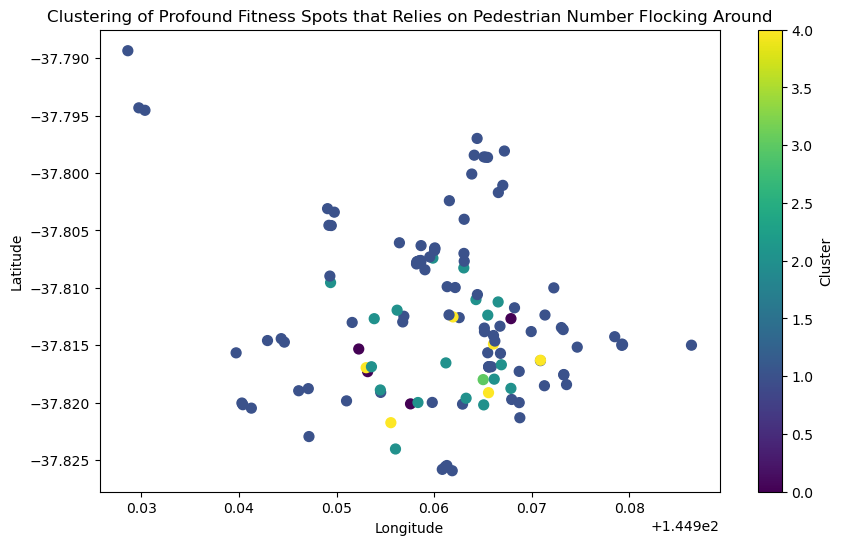

In [14]:
# data preparation for clustering

# pedestrian_count
pedCount= geoPed_data.groupby(['latitude', 'longitude'])['pedestrianCount'].sum().reset_index()
#pedCount= openSpace_geoData.groupby(['latitude', 'longitude'])
#pedCount= amenities_data.groupby(['latitude', 'longitude'])['amenitiesCount'].sum().reset_index()
X= pedCount[['latitude', 'longitude', 'pedestrianCount']]
print(X.head(len(X)))

# apply K-Means clustering to identify the popular fitness spots based on pedestrian counts
k_means= KMeans(n_clusters=5,random_state=42)
pedCount['cluster']= k_means.fit_predict(X)  # cluster assignment
print (pedCount['cluster'])

# visual representation of clusters
plt.figure(figsize= (10,6))
# pedCount['longitude'] --> Specifies the x-coordinates (longitude values) of the points.
# pedCount['latitude'] --> Specifies the y-coordinates (latitude values) of the points.
# c= pedCount['cluster'] --> The color of each point corresponds to its cluster assignment ('cluster' column in pedCount).
# cmap= 'viridis' --> Specifies the color map (viridis) to use for coloring clusters.
# s=50 --> Specifies the size of each scatteered point.
plt.scatter(pedCount['longitude'], pedCount['latitude'], c= pedCount['cluster'], cmap= 'viridis', s=50)
plt.title('Clustering of Profound Fitness Spots that Relies on Pedestrian Number Flocking Around')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

Step 6: Visualization of Analyzing pedestrian Traffic (In progress)

In [ ]:
pedCount['cluster'] = pedCount['cluster'].astype(int)

# Initialize a Folium map
map_center = [X['latitude'].mean(), X['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Assign a color for each cluster
cluster_colors = ['red', 'blue', 'green', 'purple', 'orange']

# Add markers for each point
for idx, row in pedCount.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,  # Size of the marker
        color=cluster_colors[row['cluster']],  # Color based on cluster
        fill=True,
        fill_color=cluster_colors[row['cluster']],
        fill_opacity=0.7,
        popup=folium.Popup(
            f"<b>Cluster:</b> {row['cluster']}<br>"
            f"<b>Pedestrian Count:</b> {row['pedestrianCount']}"
        )
    ).add_to(m)

# Display the map
m

Errors in Tree Canopies dataset-

In [ ]:
#centroid= treeCanopy_data.geometry.union_all().centroid
#utm_zone= int((centroid.x+180)/6)+1
#utm_crs= f"EPSG:{32600 + utm_zone if centroid.y >=0 else 32700 + utm_zone}"
##treeCanopy_data['geometry']= treeCanopy_data['geometry'].buffer(0)
##utm_crs= f"EPSG:{6933}"
# reproject to project to a projected CRS in order to obtain the acurate areas. ---> Tree canopies feature
##canopy_coverageData= treeCanopy_data.to_crs(utm_crs)
# compute tree-canopy area in square meters.
##canopy_coverageData['treeCanopy_areaM2']= canopy_coverageData.geometry.area
##print("\nFinal tree-canopy area \n",canopy_coverageData)

Rectifying the Datasets-

In [ ]:
# re-creating geometries from latitudes and longitudes.
#treeCanopy_data['geometry']= treeCanopy_data.apply(lambda row:)

In [ ]:
# spacially joined datasets.
#integrated_data= gpd.sjoin(openSpace_geoData, geoPed_data, how="inner", predicate= "intersects")
#integrated_data= gpd.sjoin(integrated_data, amenities_data, how="inner", predicate= "intersects")
#integrated_data= gpd.sjoin(integrated_data, canopy_coverageData, how="inner", predicate= "intersects")

STEP 4: EDA (Exploratory Data Analysis) 

In [ ]:
#plt.figure(figsize=(12, 6))
#sns.boxplot(data=geoPed_data, x="geoPed_data['latitude']", y="geoPed_data['pedestrianCount']")
#plt.xticks(rotation=90)
#plt.title("Pedestrian Counts Across Open Space")
#plt.show()